In [41]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch_geometric
from torch_geometric import utils
from scipy.sparse import coo_matrix
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [2]:
ec_hic = np.load('data/GBM39ec_5k_collapsed_matrix.npy')
ec_hic.shape

(251, 251)

In [3]:
hsr_hic = np.load('data/GBM39HSR_5k_collapsed_matrix.npy')
hsr_hic.shape

(251, 251)

In [4]:
hsr_hic

array([[ 907.47367526, 1046.62437477,  413.04476421, ...,  413.75284469,
         601.48550611,  989.24916505],
       [1046.62437477,  673.99985781,  877.44608729, ...,  249.40838605,
         337.15415794,  432.91358466],
       [ 413.04476421,  877.44608729,  768.76116446, ...,  170.72095892,
         180.62959193,  268.36353898],
       ...,
       [ 413.75284469,  249.40838605,  170.72095892, ...,  996.95587715,
        1170.41401995,  715.07709293],
       [ 601.48550611,  337.15415794,  180.62959193, ..., 1170.41401995,
         997.77353735, 1424.54176471],
       [ 989.24916505,  432.91358466,  268.36353898, ...,  715.07709293,
        1424.54176471, 1053.2377301 ]])

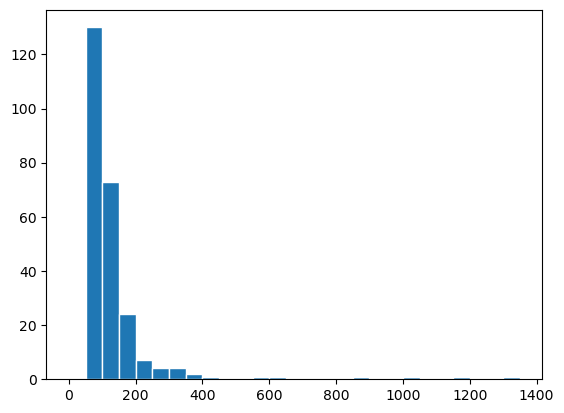

In [5]:
plt.hist(ec_hic[0], bins = np.arange(0, np.max(ec_hic[0]) + 50, 50), ec='w')
plt.show()

In [6]:
hsr_df = pd.read_csv('data/HSR_features.csv')
hsr_df.head()

chromosome  start    end  read_count  bases_covered  bin_size  \
0  NC_000001.11      0   5000           0              0      5000   
1  NC_000001.11   5000  10000           0              0      5000   
2  NC_000001.11  10000  15000         588           1083      5000   
3  NC_000001.11  15000  20000        1788           4986      5000   
4  NC_000001.11  20000  25000        2056           5000      5000   

   coverage_fraction  total_genes  total_genes_length  
0             0.0000            0                   0  
1             0.0000            0                   0  
2             0.2166            0                   0  
3             0.9972            1                  67  
4             1.0000            0                   0

In [7]:
hic_hsr = hsr_df[(hsr_df['start'] >= 54765000) & (hsr_df['end'] <= 56050000)]
hic_hsr

chromosome     start       end  read_count  bases_covered  bin_size  \
10953   NC_000001.11  54765000  54770000           2           3468      5000   
10954   NC_000001.11  54770000  54775000           5           5000      5000   
10955   NC_000001.11  54775000  54780000           2           5000      5000   
10956   NC_000001.11  54780000  54785000           3           5000      5000   
10957   NC_000001.11  54785000  54790000           2           5000      5000   
...              ...       ...       ...         ...            ...       ...   
618780  NC_000024.10  56025000  56030000           0              0      5000   
618781  NC_000024.10  56030000  56035000           0              0      5000   
618782  NC_000024.10  56035000  56040000           0              0      5000   
618783  NC_000024.10  56040000  56045000           0              0      5000   
618784  NC_000024.10  56045000  56050000           0              0      5000   

        coverage_fraction  total_genes  total_genes_length  
10953              0.6936            0                   0  
10954              1.0000            0                   0  
10955              1.0000            1               21611  
10956              1.0000            0                   0  
10957              1.0000            0                   0  
...                   ...          ...                 ...  
618780             0.0000            0                   0  
618781             0.0000            0                   0  
618782             0.0000            0                   0  
618783             0.0000            0                   0  
618784             0.0000            0                   0  

[5654 rows x 9 columns]

In [8]:
hic_hsr.groupby('chromosome')['start'].count()

chromosome
NC_000001.11    257
NC_000002.12    257
NC_000003.12    257
NC_000004.12    257
NC_000005.10    257
NC_000006.12    257
NC_000007.14    257
NC_000008.11    257
NC_000009.12    257
NC_000010.11    257
NC_000011.10    257
NC_000012.12    257
NC_000013.11    257
NC_000014.9     257
NC_000015.10    257
NC_000016.10    257
NC_000017.11    257
NC_000018.10    257
NC_000019.10    257
NC_000020.11    257
NC_000023.11    257
NC_000024.10    257
Name: start, dtype: int64

In [9]:
hic_hsr_chr7 = hic_hsr[hic_hsr['chromosome'] == 'NC_000007.14']
hic_hsr_chr7.start.nunique()

257

In [10]:
hic_hsr_chr7[(hic_hsr_chr7['start'] >= 55125000) & (hic_hsr_chr7['start'] <= 55150000)]

chromosome     start       end  read_count  bases_covered  bin_size  \
257741  NC_000007.14  55125000  55130000        2282           5000      5000   
257742  NC_000007.14  55130000  55135000        2013           5000      5000   
257743  NC_000007.14  55135000  55140000        2001           5000      5000   
257744  NC_000007.14  55140000  55145000        2758           5000      5000   
257745  NC_000007.14  55145000  55150000        2267           5000      5000   
257746  NC_000007.14  55150000  55155000        3106           5000      5000   

        coverage_fraction  total_genes  total_genes_length  
257741                1.0            0                   0  
257742                1.0            0                   0  
257743                1.0            0                   0  
257744                1.0            0                   0  
257745                1.0            0                   0  
257746                1.0            0                   0

In [11]:
hic_hsr_chr7 = hic_hsr_chr7[(hic_hsr_chr7['start'] < 55125000) | (hic_hsr_chr7['start'] > 55150000)]
hic_hsr_chr7.shape

(251, 9)

In [12]:
hic_hsr_chr7

chromosome     start       end  read_count  bases_covered  bin_size  \
257669  NC_000007.14  54765000  54770000         160           3880      5000   
257670  NC_000007.14  54770000  54775000         181           3463      5000   
257671  NC_000007.14  54775000  54780000         158           3270      5000   
257672  NC_000007.14  54780000  54785000         171           3304      5000   
257673  NC_000007.14  54785000  54790000         272           5000      5000   
...              ...       ...       ...         ...            ...       ...   
257921  NC_000007.14  56025000  56030000        1951           5000      5000   
257922  NC_000007.14  56030000  56035000        6360           5000      5000   
257923  NC_000007.14  56035000  56040000         157           5000      5000   
257924  NC_000007.14  56040000  56045000         208           5000      5000   
257925  NC_000007.14  56045000  56050000         136           5000      5000   

        coverage_fraction  total_genes  total_genes_length  
257669             0.7760            0                   0  
257670             0.6926            0                   0  
257671             0.6540            0                   0  
257672             0.6608            0                   0  
257673             1.0000            0                   0  
...                   ...          ...                 ...  
257921             1.0000            0                   0  
257922             1.0000            0                   0  
257923             1.0000            0                   0  
257924             1.0000            0                   0  
257925             1.0000            0                   0  

[251 rows x 9 columns]

In [13]:
hsr_feats = torch.tensor(hic_hsr_chr7[['read_count', 'total_genes']].to_numpy())
hsr_labels = torch.zeros(hsr_feats.shape[0])
hsr_feats.shape

torch.Size([251, 2])

In [14]:
def hic_to_sparse(hic_mat):
    adj_mat = np.triu(hic_mat)
    sparse_adj = coo_matrix(adj_mat)

    return utils.from_scipy_sparse_matrix(sparse_adj)

In [15]:
hsr_edge_index, hsr_edge_attr = hic_to_sparse(hsr_hic)

In [16]:
hsr_graph = torch_geometric.data.Data(edge_index = hsr_edge_index, edge_attr = hsr_edge_attr, x = hsr_feats, y = hsr_labels)

In [17]:
hsr_graph

Data(x=[251, 2], edge_index=[2, 31625], edge_attr=[31625], y=[251])

In [70]:
thres = np.percentile(hsr_hic, 90)
vis_hsr = hsr_hic.copy()
vis_hsr[vis_hsr < thres] = 0
np.fill_diagonal(vis_hsr, 0)

tot_genes = hic_hsr_chr7.total_genes.to_numpy()
num_reads = np.log(hic_hsr_chr7.read_count.to_numpy() + 0.0000000001)

max_weight = max(edge_weights.values())
min_weight = min(edge_weights.values())
normalized_weights = {
    edge: (weight - min_weight) * 30 / (max_weight - min_weight)
    for edge, weight in edge_weights.items()
}

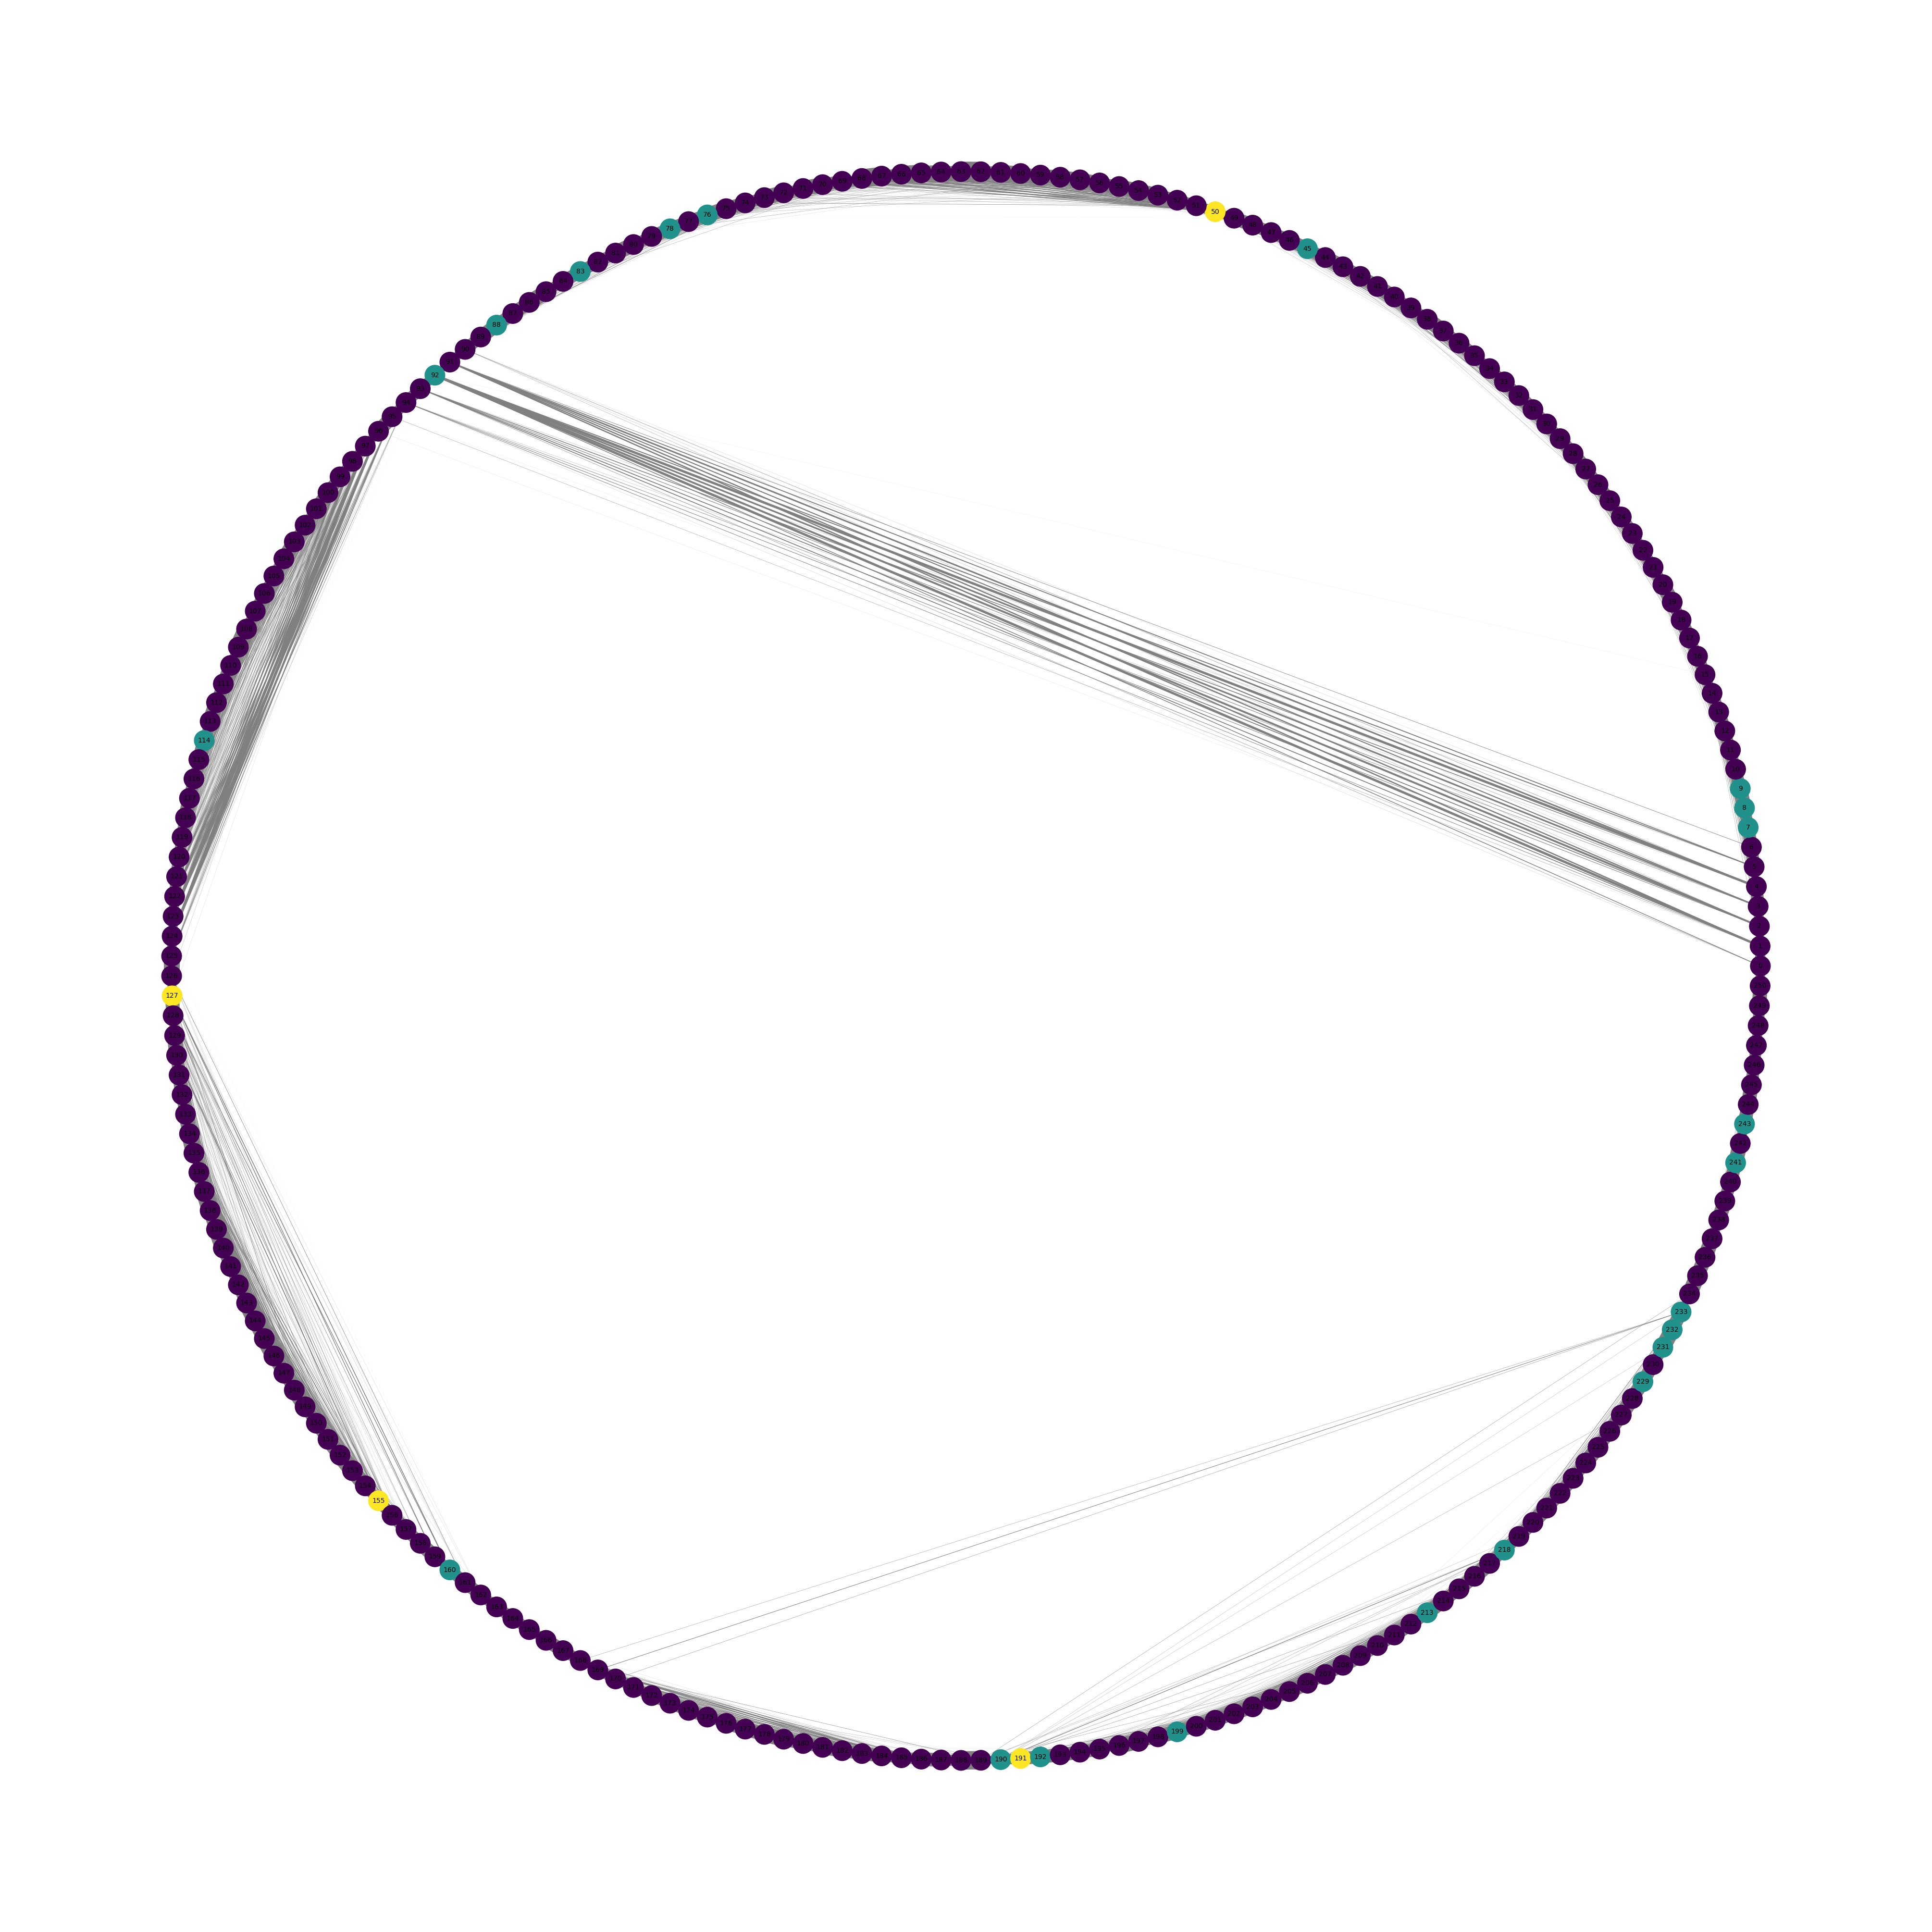

In [76]:
G = nx.from_numpy_array(vis_hsr)

#pos = nx.kamada_kawai_layout(G)
pos = nx.circular_layout(G)

plt.figure(figsize=(40, 40))
nx.draw(
    G,
    pos,
    with_labels=True,
    width=[normalized_weights.get(edge, 1) for edge in G.edges],
    node_color=tot_genes,
    edge_color="gray",
    node_size=900,
    font_size=10,
)
plt.savefig('test.png')
plt.show()

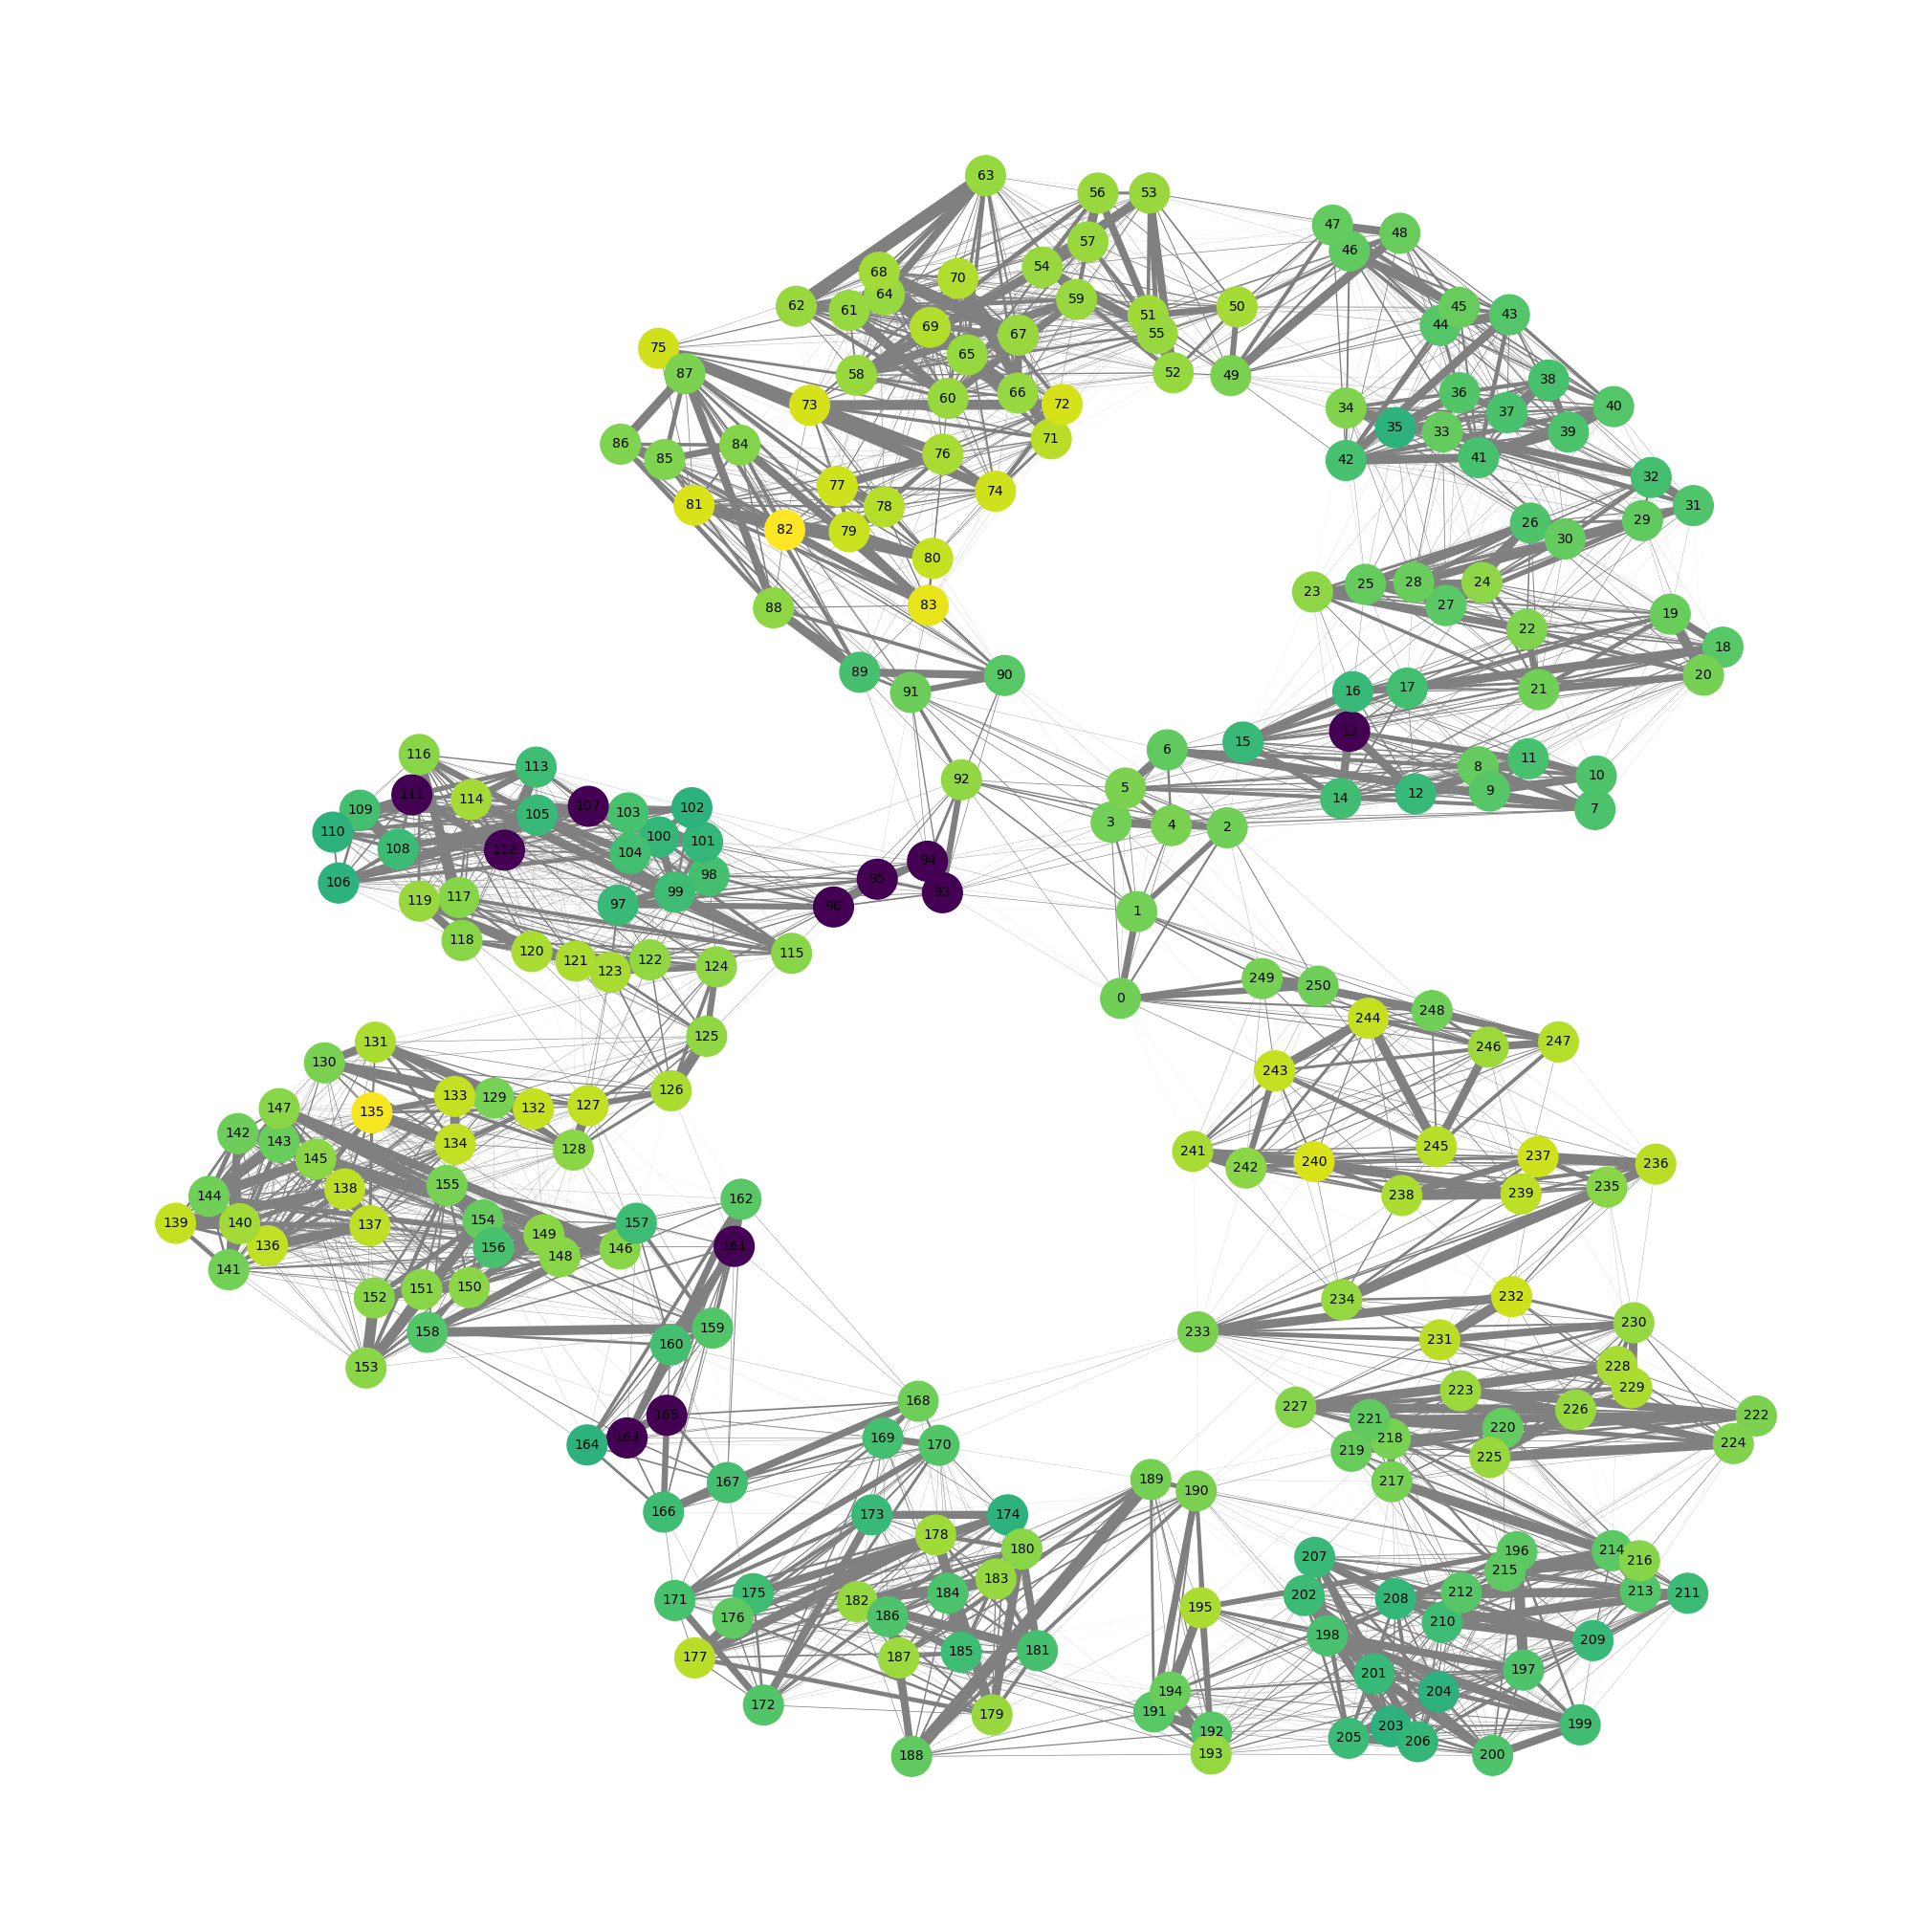

In [61]:
edge_weights = nx.get_edge_attributes(G, "weight")
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(20, 20))
nx.draw(
    G,
    pos,
    width=[normalized_weights.get(edge, 1) for edge in G.edges],
    with_labels=True,
    node_color=num_reads,
    edge_color="gray",
    node_size=900,
    font_size=10,
)

plt.show()